In [1]:
#import nltk


In [1]:
#nltk.download('all')

## The libaries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization

from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,RidgeCV

from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

import pandas as pd

import spacy

from spacy import displacy



import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
import string


import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load and read the dataset

In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv')


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Blockchain                   40
Operations Manager           40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

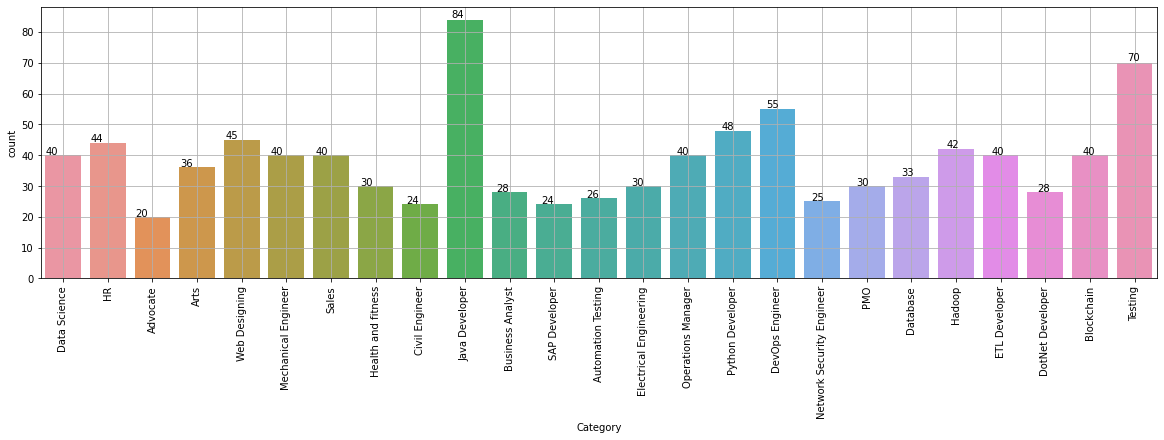

In [9]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [10]:
df_d = df.copy()

## Preprocceing 

In [11]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) #replace consecutive non-ASCII characters with a space
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = ''.join([word for word in resumeText if not word.isdigit()]) #remove any numeric characters
    resumeText = resumeText.lower() #convert text to lowercase
    return resumeText
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv da...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


### stopwords

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [14]:
new_stopwords = ["year", "less", "month", "le", "than", 'loan']
STOPWORDS = nltk.corpus.stopwords.words('english')
STOPWORDS.extend(new_stopwords)
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Resume"] = df["Resume"].apply(lambda text: remove_stopwords(text))

In [15]:
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may b e uit rgpv data sc...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


In [16]:
from collections import Counter
cnt = Counter()
for text in df["Resume"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('exprience', 3829),
 ('company', 3578),
 ('project', 3498),
 ('months', 3288),
 ('description', 3122),
 ('details', 3096),
 ('data', 2156),
 ('management', 1999),
 ('team', 1950),
 ('maharashtra', 1449)]

In [17]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["Resume"] = df["Resume"].apply(lambda text: remove_freqwords(text))
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education may may b e uit rgpv scientist scien...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education mca ymcaust faridabad haryana scienc...


In [18]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["Resume"] = df["Resume"].apply(lambda text: remove_rarewords(text))
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education may may b e uit rgpv scientist scien...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education mca ymcaust faridabad haryana scienc...


### tokenization

In [19]:
#df['Resume'] = df.apply(lambda row: nltk.word_tokenize(row['Resume']), axis=1)
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education may may b e uit rgpv scientist scien...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education mca ymcaust faridabad haryana scienc...


In [20]:
import copy

In [21]:
df_c=copy.deepcopy(df)

In [22]:
df_stem=copy.deepcopy(df)

In [23]:
df_lem=copy.deepcopy(df)

Tf idf Vectorizer (lemmatizing)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc_lem=df_lem['Resume'].values.astype('U')
cat_lem = df_lem['Category']
vec_lem= TfidfVectorizer()
fea_lem=vec_lem.fit_transform(doc_lem)


Topic Modling (lemmatizing)

In [25]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_lem["Resume"] = df_lem["Resume"].apply(lambda text: lemmatize_words(text))
df_lem.head()

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education may may b e uit rgpv scientist scien...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education mca ymcaust faridabad haryana scienc...


In [26]:
fea_lem = fea_lem.toarray()

In [27]:
# get all unique words in the corpus
vocab1_lem = vec_lem.get_feature_names()
# show document feature vectors
pd.DataFrame(fea_lem, columns=vocab1_lem)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aag,aakruti,ab,abacus,abad,abap,abasaheb,abb,abilities,ability,able,abridged,absa,absence,abstract,abu,ac,academia,academic,academy,acb,acbs,access,ace,achieve,achieved,achievement,achievements,achieving,acid,acl,acls,acn,acquire,acquired,acquiring,acquisition,across,act,acting,action,actioned,actions,active,actively,activites,activities,activity,actual,actuator,actuators,ad,ada,adalat,adani,adapt,adaptability,adaptable,adavance,add,added,adding,addition,additional,additionally,additions,addm,address,addressed,addresses,addressing,adhar,adhere,adhered,adherence,adheres,adhering,adhoc,adi,adichunchanagiri,aditya,adjoining,adjunct,adjust,admin,administer,administered,administering,administration,administrative,administrator,admitted,ado,adobe,adopt,adoption,ador,advance,advanced,advantage,advert,advertisement,advertisements,advertising,advice,adviser,advises,advisor,advisors,advisory,advocate,advocator,aed,aegis,aero,aerobics,aeronautics,aes,affairs,affect,affecting,aforesaid,africa,ag,age,agency,agent,agents,aggarwal,aggregate,aggregator,aggregators,agile,aging,agnel,agreed,agreement,agreements,agri,agricultural,agriculture,agro,ags,ahmad,aht,ahu,ai,aibe,ailments,aim,aims,air,aircheck,aircraft,airfreight,airlines,airlink,airoli,airport,airtel,airways,ais,aisect,aissms,aix,ajax,akbar,akzonobel,al,alamuri,alarm,alcatel,ale,alert,alerts,alfalah,algo,algorithm,algorithms,ali,alia,aligned,alignment,allahabad,allana,allcargo,allen,alleviate,allied,alll,allocate,allocating,allocation,allotted,allow,allowances,allowed,allows,alm,almighty,along,already,also,alterations,alternate,alternative,alternatives,altivar,alto,always,alwayson,amaravti,amazon,ambedkar,ambiguities,ambitious,ambulance,amc,amendment,amendments,amenities,america,american,americas,amex,amf,amity,aml,amman,among,amount,ampd,amravati,amreli,amsterdam,amway,anaconda,analog,analyes,analyse,analyses,analysing,analysis,analyst,analysts,analytic,analytica,analytical,analytics,...,vish,vishweshwariya,visio,vision,visit,visited,visiting,visitors,visits,vista,vistaar,vistex,vistor,visual,visualforce,visualization,visualizations,visualize,visualizing,visvesvaraya,vitsanindia,vivid,vj,vlan,vlans,vlcc,vlsi,vm,vmware,vodafone,voice,voltage,volume,volumes,volunteer,volunteering,vpc,vpi,vpn,vqi,vs,vsphere,vtp,vtu,vulnerability,vversatile,wab,wachovia,wagh,wagheducation,wai,waivers,walchand,walk,walking,walks,walkthrough,walkthroughs,wall,wallace,wallet,wallets,wan,wanless,want,wanted,war,warangal,ward,ware,warehouse,warehouses,warehousing,warner,warrants,warranty,wastages,waste,watch,watching,water,waterfall,watering,waterproofing,watson,wave,waves,way,ways,wcf,wdeploy,wds,wealth,wearable,weather,web,webdriver,webframework,webi,weblogic,weblogicc,webserver,webservers,webservices,website,websites,websphere,week,weekend,weekends,weekly,weeks,weight,weka,welding,welfare,well,wellness,west,western,wfm,wheeler,whenever,whether,whitacre,white,whole,wholesalers,wholly,whose,wi,wide,wifi,willing,willingdon,willingness,wims,win,wincc,wind,winding,window,windows,windowseducation,windowsserverr,winds,windsor,wings,winsol,winter,winxp,wipro,wireless,wiring,wise,withcustomized,within,without,wm,wmdatalake,wms,wns,women,wonderware,word,words,wordvec,work,workaround,workbench,worked,worker,workers,workflow,workflows,workforce,working,worklets,workload,works,workshop,workshops,workspace,workstation,world,worldwide,worth,would,wpl,wpmp,wqr,write,writers,writing,written,wrote,wti,wtp,wwf,www,xaml,xampp,xcode,xen,xento,xi,xii,xillinx,xinfin,xl,xml,xoriant,xp,xs,xslt,xtrabackup,xtraction,xx,yalamanchili,yallaspree,yangon,yard,yarn,yashwant,yashwantrao,yearly,years,yee,yeola,yes,yeshwantrao,yibal,ymca,ymcaust,yogesh,york,young,youth,yrs,yyyy,zaggle,zambia,zd,zenoss,zensar,zero,zhypility,zone,zookeeper,zz
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0305

LDA model (lemmatizing)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
LDA_lem = LatentDirichletAllocation(n_components=4,random_state=42)
LDA_lem.fit(fea_lem)

LatentDirichletAllocation(n_components=4, random_state=42)

In [29]:
for index,topic in enumerate(LDA_lem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_lem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['test', 'fitness', 'sales', 'java']


Top 4 words for topic #1
['python', 'pune', 'test', 'testing']


Top 4 words for topic #2
['net', 'hive', 'developer', 'hadoop']


Top 4 words for topic #3
['mechanical', 'design', 'engineering', 'java']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LSA model (lemmatizing)

In [30]:
lsa_lem = TruncatedSVD(4)
doc_topic_LSA_lem = lsa_lem.fit_transform(fea_lem)
lsa_lem.explained_variance_ratio_

array([0.00795614, 0.0292849 , 0.02220806, 0.02088728])

In [31]:
for index,topic in enumerate(lsa_lem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_lem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['pune', 'developer', 'testing', 'java']


Top 4 words for topic #1
['jquery', 'ajax', 'developer', 'java']


Top 4 words for topic #2
['servers', 'shell', 'hive', 'hadoop']


Top 4 words for topic #3
['roles', 'photoshop', 'application', 'ui']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NMF model (lemmatizing)

In [32]:
from sklearn.decomposition import NMF
nmf_model_lem = NMF(n_components=4,random_state=42)
nmf_model_lem.fit(fea_lem)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=4, random_state=42)

In [33]:
for index,topic in enumerate(nmf_model_lem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_lem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['test', 'business', 'operations', 'sales']


Top 4 words for topic #1
['python', 'ajax', 'developer', 'java']


Top 4 words for topic #2
['database', 'hive', 'shell', 'hadoop']


Top 4 words for topic #3
['responsibility', 'photoshop', 'ui', 'application']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic Modling (Stemming)

In [34]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_stem["Resume"] = df_stem["Resume"].apply(lambda text: stem_words(text))
df_stem.head()

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ may may b e uit rgpv scientist scientist ...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ mca ymcaust faridabad haryana scienc inte...


TfidfVectorizer (Stemming)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc_stem=df_stem['Resume'].values.astype('U')
cat_stem= df_stem['Category'].values.astype('U')
vec_stem= TfidfVectorizer()
fea_stem=vec_stem.fit_transform(doc_stem)


In [36]:
fea_stem.sum()

8422.755463257567

In [37]:
fea_stem = fea_stem.toarray()

In [38]:
# get all unique words in the corpus
vocab1_stem = vec_stem.get_feature_names()
# show document feature vectors
pd.DataFrame(fea_stem, columns=vocab1_stem)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aag,aakruti,ab,abacu,abad,abap,abasaheb,abb,abil,abl,abridg,absa,absenc,abstract,abu,ac,academ,academi,academia,acb,access,ace,achiev,acid,acl,acn,acquir,acquisit,across,act,action,activ,activit,actual,actuat,ad,ada,adalat,adani,adapt,adav,add,addit,addm,address,adhar,adher,adhoc,adi,adichunchanagiri,aditya,adjoin,adjunct,adjust,admin,administ,administr,admit,ado,adob,adopt,ador,advanc,advantag,advert,advertis,advic,advis,advisor,advisori,advoc,ae,aegi,aero,aerob,aeronaut,affair,affect,aforesaid,africa,ag,age,agenc,agent,aggarw,aggreg,agil,agnel,agre,agreement,agri,agricultur,agro,ahmad,aht,ahu,ai,aib,ailment,aim,air,aircheck,aircraft,airfreight,airlin,airlink,airoli,airport,airtel,airway,aisect,aissm,aix,ajax,akbar,akzonobel,al,alamuri,alarm,alcatel,ale,alert,alfalah,algo,algorithm,ali,alia,align,allahabad,allana,allcargo,allen,allevi,alli,alll,alloc,allot,allow,alm,almighti,along,alreadi,also,alter,altern,altivar,alto,alway,alwayson,amaravti,amazon,ambedkar,ambigu,ambiti,ambul,amc,amen,amend,america,american,amex,amf,amiti,aml,amman,among,amount,ampd,amr,amravati,amsterdam,amway,anaconda,analog,analy,analys,analysi,analyst,analyt,analytica,analytika,analyz,anantrao,andheri,andhra,andrew,android,angel,angular,angulareduc,angularj,anjular,anna,annet,annexur,annot,annual,anomali,anoth,ansalon,ansibl,answer,ant,anti,anushaktinagar,anyth,ao,aofptc,ap,apac,apach,apachetomcatserv,apart,apeksha,apex,apfc,api,apo,app,appdynam,appeal,appel,appl,applaud,appli,applianc,applic,applicationseduc,applock,appoint,apprais,appreci,approach,appropri,approv,approxim,apr,april,aptech,ar,arabia,arabian,arbitr,architect,architectur,archiv,arduino,area,arena,...,vfd,vhd,vi,via,viabil,viabl,viamedia,vice,vidarbha,video,vidisha,vidishtra,vidya,vidyabharati,vidyalankar,vidyalaya,vidyapeeth,vidyashram,view,viewer,vii,viii,vijeo,villa,vimay,vinayaka,vintela,violat,violenc,vip,viralsoci,virtual,virtualbox,virtualis,virtuou,visa,vise,vish,vishweshwariya,visio,vision,visit,visitor,vista,vistaar,vistex,vistor,visual,visualforc,visvesvaraya,vitsanindia,vivid,vj,vlan,vlcc,vlsi,vm,vmware,vodafon,voic,voltag,volum,volunt,vpc,vpi,vpn,vqi,vs,vsphere,vtp,vtu,vulner,vversatil,wab,wachovia,wagh,wagheduc,wai,waiver,walchand,walk,walkthrough,wall,wallac,wallet,wan,wanless,want,war,warang,ward,ware,wareh,warehous,warner,warrant,warranti,wast,wastag,watch,water,waterfal,waterproof,watson,wave,way,wcf,wd,wdeploy,wealth,wearabl,weather,web,webdriv,webframework,webi,weblog,weblogicc,webserv,webservic,websit,webspher,week,weekend,weekli,weight,weka,weld,welfar,well,west,western,wfm,wheeler,whenev,whether,whitacr,white,whole,wholesal,wholli,whose,wi,wide,wifi,will,willing,willingdon,wim,win,wincc,wind,window,windowseduc,windowsserverr,windsor,wing,winsol,winter,winxp,wipro,wire,wireless,wise,withcustom,within,without,wm,wmdatalak,wn,women,wonderwar,word,wordvec,work,workaround,workbench,worker,workflow,workforc,worklet,workload,workshop,workspac,workstat,world,worldwid,worth,would,wpl,wpmp,wqr,write,writer,written,wrote,wti,wtp,wwf,www,xaml,xampp,xcode,xen,xento,xi,xii,xillinx,xinfin,xl,xml,xoriant,xp,xs,xslt,xtrabackup,xtraction,xx,yalamanchili,yallaspre,yangon,yard,yarn,yashwant,yashwantrao,ye,year,yearli,yee,yeola,yeshwantrao,yibal,ymca,ymcaust,yogesh,york,young,youth,yr,yyyi,zaggl,zambia,zd,zenoss,zensar,zero,zhypil,zone,zookeep,zz
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.069245,0.0,0.025362,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.029269,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

LDA model (Stemming)

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
LDA_stem = LatentDirichletAllocation(n_components=4,random_state=42)
LDA_stem.fit(fea_stem)

LatentDirichletAllocation(n_components=4, random_state=42)

In [40]:
for index,topic in enumerate(LDA_stem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_stem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['univers', 'mumbai', 'size', 'pune']


Top 4 words for topic #1
['hr', 'pune', 'engin', 'januari']


Top 4 words for topic #2
['databas', 'java', 'develop', 'test']


Top 4 words for topic #3
['hdf', 'sqoop', 'hive', 'hadoop']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
lsa_stem = TruncatedSVD(4)
doc_topic_LSA = lsa_stem.fit_transform(fea_stem)
lsa_stem.explained_variance_ratio_

array([0.01206291, 0.03219226, 0.02439994, 0.0244792 ])

In [42]:
for index,topic in enumerate(lsa_stem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_stem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['use', 'java', 'develop', 'test']


Top 4 words for topic #1
['javascript', 'jqueri', 'ajax', 'java']


Top 4 words for topic #2
['server', 'script', 'hive', 'hadoop']


Top 4 words for topic #3
['window', 'transform', 'autom', 'test']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
from sklearn.decomposition import NMF
nmf_model_stem = NMF(n_components=4,random_state=42)
nmf_model_stem.fit(fea_stem)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=4, random_state=42)

In [44]:
for index,topic in enumerate(nmf_model_stem.components_):
    print(f'Top 4 words for topic #{index}')
    print([vec_stem.get_feature_names()[i] for i in topic.argsort()[-4:]])
    print('\n')

Top 4 words for topic #0
['busi', 'report', 'manag', 'sale']


Top 4 words for topic #1
['jqueri', 'python', 'develop', 'java']


Top 4 words for topic #2
['databas', 'script', 'server', 'hadoop']


Top 4 words for topic #3
['autom', 'transform', 'engin', 'test']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Naming the topics from our best model **NMF(Stemming)**

In [45]:
topic_NMF = nmf_model_stem.transform(fea_stem)
topic_NMF.shape

(962, 4)

In [46]:
df_stem['NMF'] = topic_NMF.argmax(axis=1)
df_stem.head(10)


,Category,Resume,NMF
0,Data Science,skill program languag python panda numpi scipi...,1
1,Data Science,educ may may b e uit rgpv scientist scientist ...,2
2,Data Science,area interest deep learn control system design...,1
3,Data Science,skill r python sap hana tableau sap hana sql s...,2
4,Data Science,educ mca ymcaust faridabad haryana scienc inte...,1
5,Data Science,skill c basic iot python matlab scienc machin ...,1
6,Data Science,skill python tableau visual r studio machin le...,0
7,Data Science,educ b tech rayat bahra institut engin biotech...,2
8,Data Science,person skill abil quickli grasp technic aspect...,1
9,Data Science,expertis quantit analysi decis analyt predict ...,0


In [47]:
df_stem.NMF.replace({0: 'Management', 1: 'Development', 2:'Server Administration', 3: 'Engineering'}, inplace = True)

In [48]:
df_stem.head()

,Category,Resume,NMF
0,Data Science,skill program languag python panda numpi scipi...,Development
1,Data Science,educ may may b e uit rgpv scientist scientist ...,Server Administration
2,Data Science,area interest deep learn control system design...,Development
3,Data Science,skill r python sap hana tableau sap hana sql s...,Server Administration
4,Data Science,educ mca ymcaust faridabad haryana scienc inte...,Development


In [49]:
df_stem.tail()

,Category,Resume,NMF
957,Testing,comput skill profici ms offic word basic excel...,Engineering
958,Testing,willing ept challeng posit think good learner ...,Engineering
959,Testing,person skill quick learner eager learn new thi...,Engineering
960,Testing,comput skill softwar knowledg ms power point m...,Engineering
961,Testing,skill set os window xp databas mysql sql serve...,Engineering


In [50]:
first_topic = nmf_model_stem.components_[0]
second_topic = nmf_model_stem.components_[1]
third_topic = nmf_model_stem.components_[2]
fourth_topic = nmf_model_stem.components_[3]


In [51]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [52]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [53]:
first_topic_words = [vocab1_stem[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [vocab1_stem[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [vocab1_stem[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [vocab1_stem[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]


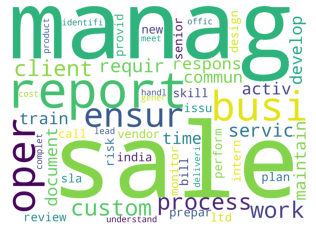

In [54]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

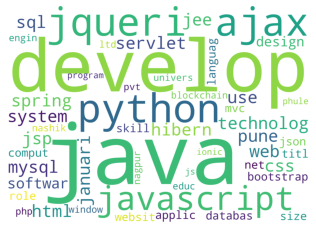

In [55]:
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

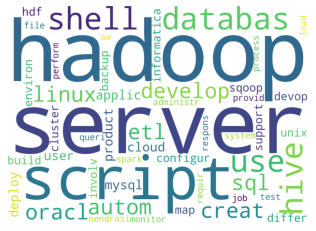

In [56]:
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

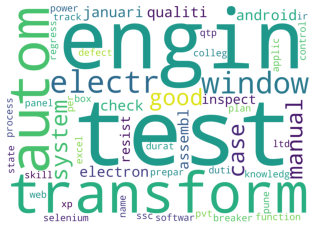

In [57]:
fourthcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

### Classification

In [58]:
print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(fea_stem,cat_stem,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 5166)
(193, 5166)


In [59]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier KNeighborsClassifier():
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      0.78      0.88         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineerin

### Clustring

In [60]:
from sklearn.cluster import KMeans

In [61]:
def display_cluster(features_clus,km=[4],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

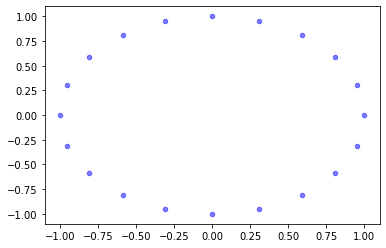

In [62]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

In [63]:
documents_clus = df_c['Resume'].values.astype('U')

In [64]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

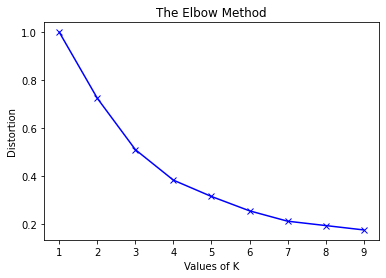

In [65]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_clus = TfidfVectorizer(stop_words= 'english')
features_clus = vec_clus.fit_transform(documents_clus)

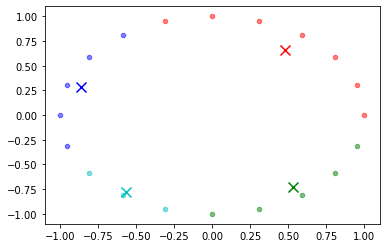

In [67]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)